# Exploring Financial Data using Nasdaq Data Link API

During this project we are going to extract financial data from a specific set of companies so we can understand their performance over time. We will be paying attention at things like `Accrued Expenses Trunover`, and we will explore how these values differ between companies and regions.

In [1]:
!pip install nasdaq-data-link
import nasdaqdatalink

In [2]:
#importing the libraries and the config.py file
import config
import requests
import pandas as pd
import json

# configurating the api_key
api_key = config.api_key

In [3]:
#base url
url = "https://data.nasdaq.com/api/v3/datatables/MER/F1.json"

#our "parameters" dictionary

parameters = {
    "api_key":api_key,
    "qopts.per_page": 10
}

#fetching the data and converting it to json

json_data = requests.get(url, params = parameters).json()

print(json_data)

{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

## Changing the JSON file into a DataFrame

We are now going to change the json file that we created from the data in the previous step into a dataframe so we can analyse, manipulate, and stract insights from the data more easily. In this case the `data` key holds a list of lists with each list containing the information of one row, while the `columns` key contains a list of dictionaries with the column names and their type.

In [4]:
# We are going to update the parameters to return 10K rows rather than just 10

url = "https://data.nasdaq.com/api/v3/datatables/MER/F1.json"
parameters = {
    "api_key": api_key,
    "qopts.per_page": 10000
}

json_data = requests.get(url, params = parameters).json()

data = json_data["datatable"]["data"] #extract the data from the json file
columns = [col["name"] for col in json_data["datatable"]["columns"]] #extract the column names from the json file

#We are now going to create a dataframe

df_metric = pd.DataFrame(data, columns=columns)
print(df_metric.head())



   compnumber    reportid  mapcode     amount  reportdate reporttype  \
0        2438  1868192544    -1802  10.481948  2011-06-30         Q2   
1        2438  1868216112    -1802   8.161754  2011-09-30         Q3   
2        2438  1885063456    -1802  10.788213  2012-06-30         Q2   
3        2438  1885087024    -1802   9.437545  2012-09-30         Q3   
4        2438  1901934112    -1802   8.755041  2013-06-30         Q2   

  auditorstatus currency consolidated          longname  ...  \
0             U      EUR         True  Deutsche Bank AG  ...   
1             U      EUR         True  Deutsche Bank AG  ...   
2             U      EUR         True  Deutsche Bank AG  ...   
3             U      EUR         True  Deutsche Bank AG  ...   
4             U      EUR         True  Deutsche Bank AG  ...   

                city statecode country zipcode     phonenumber  \
0  Frankfurt am Main      None     DEU   60325  (49) 69 910 00   
1  Frankfurt am Main      None     DEU   60325  (4

## Understanding the dataset

Since the data is now in a Pandas DataFrame we can now easily gain some insights into the different columns in a dataset, the amount of rows and columns that the dataset has etc.

In [5]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

We know that we don't need all the columns listed there, so we probably should remove some of them to make it easier on ourselves and to facilitate gaining insights. These are the columns we are interested in:

| Column Name    | Description                                                |
|----------------|------------------------------------------------------------|
| `compnumber`   | Unique identifier for each company                         |
| `reportid`     | ID associated with a specific financial report             |
| `mapcode`      | Code representing a specific financial metric or data point|
| `amount`       | Numerical value of the financial metric                    |
| `reportdate`   | Date of the financial report                               |
| `reporttype`   | Type of the report (e.g., Q1, Q2)                          |
| `currency`     | Currency in which financial amounts are reported           |
| `longname`     | The name of the bank or company                            |
| `city`         | The city to which a given bankor company belong            |
| `country`      | region to which a given bank or company is situated        |
| ...            | ...                                                        |
| `indicator`    | Specific financial indicator being reported                |
| `statement`    | Type of financial statement from which the data is derived |

In [6]:
needed_columns = ["compnumber", "reportid", "mapcode","amount","reportdate","reporttype","currency","longname","city","country","indicator","statement"]

The columns `indicator`, `country`, `longname`, `reportdate`, `reporttype`, `amount` are particularly important for the type of analysis we are trying to make, they will be key in helping us analyse and understand fianancial trends and making regional comparisons.

We want to pay special attention to any rows that mention the `accrued expenses turnover` term. This is a key financial efficiency ratio that tells us how often a company pays off its accrued expenses within a certain period. As such, it is an indicator of how well the company manages cash flow (a higher ratio means higher liquidity), of the operational efficiency or how quicly they pay their short-term debts, and of the financial healt and creditworthiness of a company.

In [7]:
filtered_df = df_metric[needed_columns]
filtered_df = filtered_df[filtered_df["indicator"] == "Accrued Expenses Turnover" ]

In [8]:
filtered_df.describe()

,compnumber,reportid,mapcode,amount
count,139.000000,1.390000e+02,139.0,139.000000
mean,68292.302158,1.633594e+09,-1802.0,26.908762
std,53272.892697,1.385283e+08,0.0,33.097291
min,1409.000000,1.504051e+09,-1802.0,4.689773
25%,12161.000000,1.543963e+09,-1802.0,9.675670
50%,104579.000000,1.581646e+09,-1802.0,13.753753
75%,111113.000000,1.622541e+09,-1802.0,31.777614
max,133772.000000,1.952498e+09,-1802.0,229.810427


From the table above we can see that te averate turnover ratio for companies within the dataset is 26.91%, with a minimum of 4.69 and a maximum of 229.81. This means there's a great variety in how companies manage their financials. The 33% standard deviation also suggests big differences in the way companies handle their short term liabilities. This can be a reflection of different industries and company sizes.

## Making country names more readable

Right now country names appear in form of a country code rather than the name of the country itself. This can be a problem for those that are not familiar with all the country codes. Knowing this we are going to update the country name codes to their full names.

In [9]:
filtered_df.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,currency,longname,city,country,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,EUR,Deutsche Bank AG,Frankfurt am Main,DEU,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,EUR,Deutsche Bank AG,Frankfurt am Main,DEU,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,EUR,Deutsche Bank AG,Frankfurt am Main,DEU,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,EUR,Deutsche Bank AG,Frankfurt am Main,DEU,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,EUR,Deutsche Bank AG,Frankfurt am Main,DEU,Accrued Expenses Turnover,Derived


In [21]:
country_mapping = {
    'USA': 'United States of America',
    'CAN': 'Canada',
    'GBR': 'United Kingdom',
    'DEU': 'Germany',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'BHS': 'Bahamas',
    'IRL': 'Ireland'
}

def update_country_name(abbreviation):
    return country_mapping.get(abbreviation, abbreviation)

filtered_df = filtered_df.copy()
filtered_df["country_name"] = filtered_df["country"].apply(update_country_name)

filtered_df.rename(columns = {
    "longname":"company_name",
    "reportdate":"report_date",
    "reporttype":"report_type",
    "amount":"accrued_expenses_turnover"
}, inplace = True)

updated_df = filtered_df.copy()

In [22]:
updated_df["country_name"].value_counts()

United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
United Kingdom               4
Name: country_name, dtype: int64

## We now want to understand the financial trends over time

For that we are going to plot a few graphs. We are only interested in the years that go from 2010 to 2015.

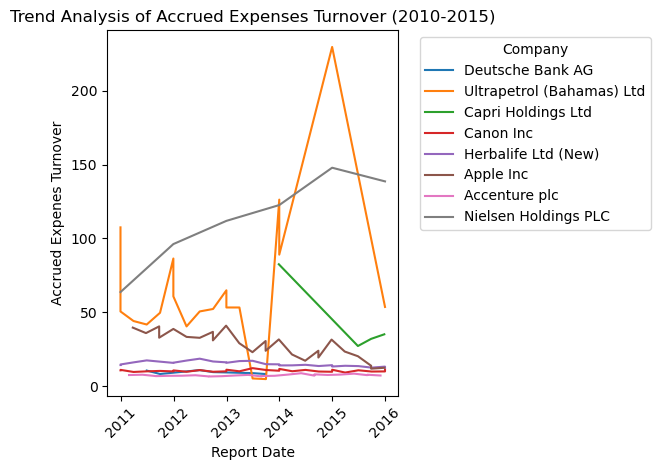

In [23]:
import matplotlib.pyplot as plt
updated_df["report_date"] = pd.to_datetime(updated_df["report_date"])
update_df = updated_df[(updated_df["report_date"].dt.year >= 2010) & (updated_df["report_date"].dt.year <= 2015)]

relevant_data = updated_df[["company_name","report_date", "accrued_expenses_turnover"]].copy()

for company in relevant_data["company_name"].unique():
    company_data = relevant_data[relevant_data["company_name"] == company]
    plt.plot(company_data["report_date"], company_data["accrued_expenses_turnover"], label = company)

plt.legend(title = "Company", bbox_to_anchor =(1.05,1), loc="upper left")
plt.title("Trend Analysis of Accrued Expenses Turnover (2010-2015)")
plt.xlabel("Report Date")
plt.ylabel("Accrued Expenes Turnover")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()   



We can see that some companies like UltraPetrol had a significan spike in 2014 in terms of financial efficiency and their abililty to pay off their accrued expenses. While others like Apple and Accenture follow more stable trends. 

## Geographical region analysis

Now we want to see if there are differences between the countries and the way the companies manage their financials. To do that we first need to group the companies by country.

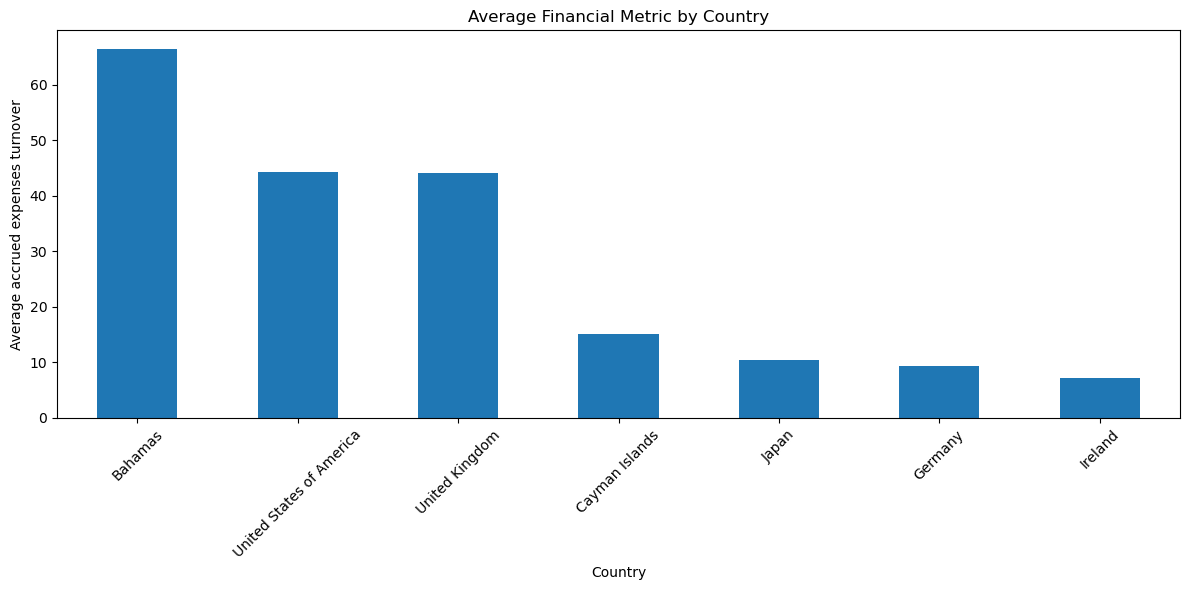

In [24]:
country_avg = updated_df.groupby("country_name")["accrued_expenses_turnover"].mean()
plt.figure(figsize = (12,6))
country_avg.sort_values(ascending=False).plot(kind="bar")
plt.title("Average Financial Metric by Country")
plt.xlabel("Country")
plt.ylabel("Average accrued expenses turnover")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It looks like there are significant differences between countries, with companies in the Bahamas having a much higher average turnover of accured expenses than Ireland.